# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date 
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [18]:
# use this url and perform an api.openweathermap to see what an individual data look like 
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Create empty list to store our data from the web 
city_weather = []
record = 0 
set = 1

for city in cities:
    city_read = url + city
    record += 1 
    print("Processing Record " + str(record) + " of Set " + str(set) + " | " + city)
    try:
        data_requested = requests.get(city_read).json()
        city_weather.append({"City" : city,
                            "Cloudiness" : data_requested["clouds"]["all"],
                            "Country" : data_requested["sys"]["country"],
                            "Date" : data_requested["dt"],
                            "Humidity" : data_requested["main"]["humidity"],
                            "Lat": data_requested["coord"]["lat"],
                            "Lng": data_requested["coord"]["lon"],
                            "Max Temp" : data_requested["main"]["temp_max"],
                            "Wind Speed" : data_requested["wind"]["speed"]})
        if (record >= 50):
            record = 0
            set += 1
        
    except:
        print("City not found. Skipping...")
        pass
print("--------------------------------\nData Retrieval Complete\n--------------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | suamico
Processing Record 7 of Set 1 | oranjestad
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | new norfolk
Processin

Processing Record 34 of Set 4 | dongkan
Processing Record 35 of Set 4 | malanje
Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | miguel calmon
Processing Record 38 of Set 4 | coquimbo
Processing Record 39 of Set 4 | yerbogachen
Processing Record 40 of Set 4 | port keats
Processing Record 41 of Set 4 | bereda
Processing Record 42 of Set 4 | bridlington
Processing Record 43 of Set 4 | north bend
Processing Record 44 of Set 4 | tansen
Processing Record 45 of Set 4 | mao
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | malindi
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 50 of Set 4 | megion
Processing Record 1 of Set 5 | manado
Processing Record 2 of Set 5 | morros
Processing Record 3 of Set 5 | juegang
Processing Record 4 of Set 5 | faro
Processing Record 5 of Set 5 | turukhansk
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | sentyabrskiy
City not fo

Processing Record 22 of Set 8 | barberena
Processing Record 23 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 24 of Set 8 | avanigadda
Processing Record 25 of Set 8 | ulma
Processing Record 26 of Set 8 | dunedin
Processing Record 27 of Set 8 | pekalongan
Processing Record 28 of Set 8 | porgera
Processing Record 29 of Set 8 | aykhal
Processing Record 30 of Set 8 | salgar
Processing Record 31 of Set 8 | boende
Processing Record 32 of Set 8 | opuwo
Processing Record 33 of Set 8 | beringovskiy
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 36 of Set 8 | ambovombe
Processing Record 37 of Set 8 | hay river
Processing Record 38 of Set 8 | ulaanbaatar
Processing Record 39 of Set 8 | asau
City not found. Skipping...
Processing Record 40 of Set 8 | vanimo
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | yichun

Processing Record 5 of Set 12 | the pas
Processing Record 6 of Set 12 | tura
Processing Record 7 of Set 12 | nhulunbuy
Processing Record 8 of Set 12 | mogadishu
Processing Record 9 of Set 12 | makat
Processing Record 10 of Set 12 | boda
Processing Record 11 of Set 12 | inirida
Processing Record 12 of Set 12 | bairiki
City not found. Skipping...
Processing Record 13 of Set 12 | tosya
Processing Record 14 of Set 12 | palana
Processing Record 15 of Set 12 | palmas
Processing Record 16 of Set 12 | carman
Processing Record 17 of Set 12 | sars
Processing Record 18 of Set 12 | tateyama
Processing Record 19 of Set 12 | garden city
Processing Record 20 of Set 12 | cortez
Processing Record 21 of Set 12 | halalo
City not found. Skipping...
Processing Record 22 of Set 12 | bac lieu
City not found. Skipping...
Processing Record 23 of Set 12 | kondoa
Processing Record 24 of Set 12 | korem
Processing Record 25 of Set 12 | bunbury
Processing Record 26 of Set 12 | luau
Processing Record 27 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# use .count() function to find how many rows we found in our api calls 
weather_dataframe = pd.DataFrame(city_weather)
weather_dataframe.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

In [24]:
# Export the data into a .csv files 
weather_dataframe.to_csv(output_data_file)

In [25]:
weather_dataframe = pd.DataFrame(city_weather)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,92,CL,1578442556,58,-53.16,-70.91,286.15,4.60
1,guerrero negro,93,MX,1578443010,31,27.97,-114.04,294.00,2.99
2,busselton,27,AU,1578442528,66,-33.64,115.35,295.93,0.45
3,tasiilaq,100,GL,1578442340,45,65.61,-37.64,259.55,12.55
4,albany,90,US,1578442862,63,42.65,-73.75,273.71,2.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

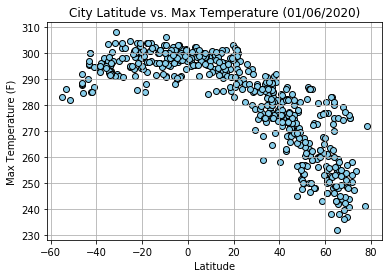

In [26]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/06/2020)")
plt.grid (b=True)
plt.savefig("savefig/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

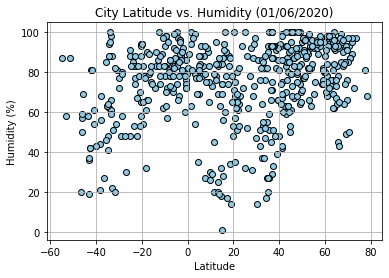

In [27]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (01/06/2020)")
plt.grid (b=True)
plt.savefig("savefig/lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

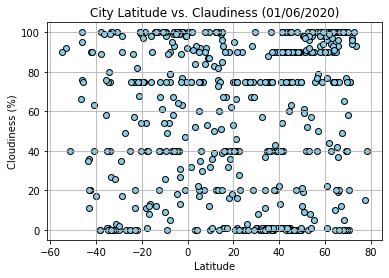

In [28]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Claudiness (01/06/2020)")
plt.grid(b=True)
plt.savefig("savefig/lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

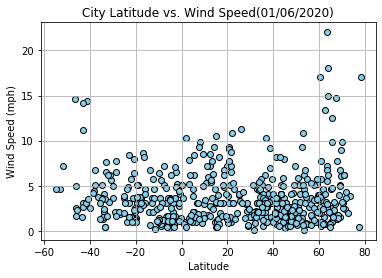

In [29]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],facecolors="skyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed(01/06/2020)")
plt.grid(b=True)
plt.savefig("savefig/lat_vs_windspeed.png")
plt.show()